<a href="https://colab.research.google.com/github/Melaan99/Stroke-Prediction/blob/main/German_english_translator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Técnicas Avanzadas de Inteligencia Artificial**

**Tema: Traducción de texto del alemán al inglés utilizando redes codificador-decodificador con atención.**


Autor: Lina María Ferrer Rodríguez linamfr@uci.cu

Centro de Estudios de Matemática Computacional *texto en cursiva*



---

# ¿Qué es la traducción automática neuronal?

"La traducción automática es la tarea de convertir automáticamente texto fuente en una lengua a texto en otra lengua. Dada una secuencia de texto en una lengua de partida, no existe una única traducción óptima de ese texto a otra lengua. Esto se debe a la ambigüedad y flexibilidad naturales del lenguaje humano. Esto hace que el reto de la traducción automática sea difícil, quizá uno de los más difíciles de la inteligencia artificial".

- "Machine Learning Mastery" por Jason Brownlee, Ph.D.

Inicialmente, los problemas de traducción automática (TA) se afrontaban utilizando enfoques estadísticos, basados principalmente en las probabilidades de Bayes. Pero cuando las redes neuronales se hicieron más potentes y populares, los investigadores empezaron a explorar las capacidades de esta tecnología y se encontraron nuevas soluciones. Es lo que se denomina traducción automática neuronal (NMT, en inglés, Neural Machine Translation).


# ¿Que son las redes codificador-decodificador con atención?

NMT es un problema en el que se procesa una secuencia de entrada para producir una secuencia de salida, es decir, un problema de secuencia a secuencia (seq2seq).
De lo anterior se deduce que la TNM es un problema en el que procesamos una secuencia de entrada para producir una secuencia de salida, es decir, un problema de secuencia a secuencia (seq2seq). Concretamente, el tipo many-to-many, con una secuencia de varios elementos tanto en la entrada como en la salida. Existen varias arquitecturas para resolver problemas de seq2seq en el procesamiento del lenguaje natural, una de las más utilizadas es precisamente las redes codificador-decodificador con atención.

Las redes codificador-decodificador son una arquitectura de redes neuronales en las que, el codificador transforma una secuencia de entrada en un vector de características y el decodificador utiliza ese vector de características para generar una secuencia de salida. Las redes codificador-decodificador con atención son una variante de las redes codificador-decodificador que utilizan un mecanismo de atención para mejorar la calidad de las traducciones automáticas y otras tareas de procesamiento del lenguaje natural.


#Codificador:

El codificador es un tipo de red que "codifica", es decir, obtiene o extrae características de unos datos de entrada dados. Lee la secuencia de entrada y resume la información en algo llamado vectores de estado interno o vector de contexto (en el caso de la red LSTM, se llaman vectores de estado oculto y de estado de celda). Normalmente se descartan las salidas del codificador y sólo conservamos los estados internos. Este vector de contexto pretende contener toda la información de todos los elementos de entrada para ayudar al descodificador a realizar predicciones precisas. El estado oculto y el estado de las neuronas de la red se pasan al decodificador como entrada.

#Decodificador:

Un decodificador es algo que "decodifica", interpreta el vector de contexto obtenido del codificador. El vector de contexto de la última neurona del codificador es la entrada a la primera neurona de la red del decodificador. Utilizando estos estados iniciales, el descodificador empieza a generar la secuencia de salida, y estas salidas también se tienen en cuenta para futuras predicciones. Una pila de varias unidades LSTM en la que cada una predice una salida (digamos y_hat) en un paso de tiempo t.Cada unidad recurrente acepta un estado oculto de la unidad anterior y produce una salida, así como su propio estado oculto para pasar a lo largo de la red posterior.


#Mecanismo de atención


La atención es una mejora de la red existente de modelos secuencia a secuencia que aborda esta limitación. La sencilla razón por la que se denomina "atención" es por su capacidad para obtener significado en las secuencias. En primer lugar, funciona proporcionando un contexto más ponderado o más significado desde el codificador al decodificador y un mecanismo de aprendizaje en el que el decodificador puede interpretar que, en realidad, presta más "atención" a la red de codificación posterior cuando predice las salidas en cada paso temporal de la secuencia de salida.


Podemos considerar que, al utilizar el mecanismo de atención, existe la idea de liberar la arquitectura codificador-decodificador existente de la representación interna de longitud corta fija del texto. Esto se consigue manteniendo las salidas intermedias de la red LSTM codificadora, que corresponden a un determinado nivel de significación, de cada paso de la secuencia de entrada y, al mismo tiempo, entrenando al modelo para que aprenda y preste atención selectiva a estos elementos intermedios y los relacione después con elementos de la secuencia de salida.





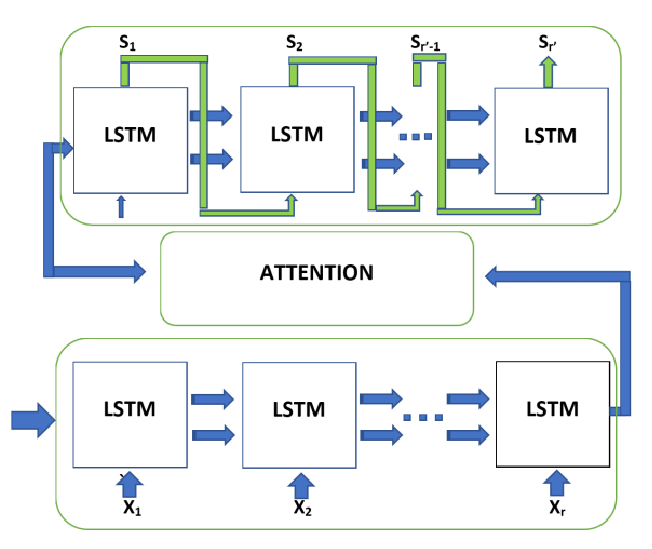

En el ejemplo que se estará trabajando se utilizarán estas redes para la **traducción** de texto del **alemán** al **inglés**.


In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
import string
from string import digits
import re
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Input, Dense,Embedding, Concatenate, TimeDistributed
from tensorflow.keras.models import Model,load_model, model_from_json
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
import pickle as pkl
import numpy as np

# Adquicisión de los datos
El conjunto de datos lingüísticos a trabajar está disponible en :
http://www.manythings.org/anki/

Este sitio contiene un conjunto de datos de numerosos idiomas y su traducción al inglés. Se puede descargar cualquier conjunto de datos de idiomas según preferencias y comodidad. En este caso, se utilizará el conjunto de datos German - English que contiene 38696

In [ ]:
drive.mount('/content/drive')

url='https://drive.google.com/file/d/1qKlylT8bEjuYP8iuoqqytyY6h1bvZYs1/view?usp=drive_link'
file_path = "/content/drive/My Drive/técnicas avanzadas de inteligenci artificial/deu.txt"


with open(file_path, 'r') as file:
    data = file.read()


# Preprocesamiento
Los datos importados se trata de un archivo de texto sin procesar. Para trabajar con el mismo, es necesario limpiarlo y transformarlo. Se separarán las frases en alemán e inglés y se formará una lista con ellas, continuando con su almacenamiento en un dataframe para que resulte fácil reutilizarlo de nuevo.

In [ ]:
#Transformación de los datos

uncleaned_data_list = data.split('\n')
len(uncleaned_data_list)
uncleaned_data_list = uncleaned_data_list[:38695]
len(uncleaned_data_list)
english_word = []
german_word = []
cleaned_data_list = []
for word in uncleaned_data_list:
  english_word.append(word.split('\t')[:-1][0])
  german_word.append(word.split('\t')[:-1][1])
language_data = pd.DataFrame(columns=['English','German'])
language_data['English'] = english_word
language_data['German'] = german_word
language_data.to_csv('language_data.csv', index=False)

In [ ]:
language_data.head()
english_text = language_data['English'].values
german_text = language_data['German'].values
len(english_text), len(german_text)

In [ ]:
#Limpieza de los datos

#convertir a minúscula
english_text_ = [x.lower() for x in english_text]
german_text_ = [x.lower() for x in german_text]


#eliminar las comas invertidas
english_text_ = [re.sub("'",'',x) for x in english_text_]
german_text_ = [re.sub("'",'',x) for x in german_text_]
def remove_punc(text_list):
  table = str.maketrans('', '', string.punctuation)
  removed_punc_text = []
  for sent in text_list:
    sentance = [w.translate(table) for w in sent.split(' ')]
    removed_punc_text.append(' '.join(sentance))
  return removed_punc_text
english_text_ = remove_punc(english_text_)
german_text_ = remove_punc(german_text_)
remove_digits = str.maketrans('', '', digits)
removed_digits_text = []
for sent in english_text_:
  sentance = [w.translate(remove_digits) for w in sent.split(' ')]
  removed_digits_text.append(' '.join(sentance))
english_text_ = removed_digits_text


# eliminar caracteres de las frases en alemán
german_text_ = [re.sub("[^a-zA-Z0-9öÖäÄüÜß@\\s]","",x) for x in german_text_]


# eliminar espacios al principio y al final de las frases
english_text_ = [x.strip() for x in english_text_]
german_text_ = [x.strip() for x in german_text_]


# Añadir las etiquetas "start" y "end" a las frases en alemán
german_text_ = ["start " + x + " end" for x in german_text_]
german_text_[0], english_text_[0]

Preparación de los datos para el modelo:

Se dividen los datos con una proporción de 0,1, X_train y Y_train serán el conjunto de entrenamiento, X_test y Y_test serán los conujntos de prueba.


In [ ]:
X = english_text_
Y = german_text_
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.1)

#determinar la longitud máxima de las frases en ambos idiomas
def Max_length(data):
  max_length_ = max([len(x.split(' ')) for x in data])
  return max_length_

#Training data
max_length_english = Max_length(X_train)
max_length_german = Max_length(y_train)

#Test data
max_length_english_test = Max_length(X_test)
max_length_german_test = Max_length(y_test)
max_length_german, max_length_english

# Toquenización

La tokenización es un paso importante en la construcción de estas redes ya que permite que el modelo trabaje con una representación numérica del texto en lugar del texto en sí, lo que facilita el procesamiento y la manipulación de los datos. Además, la tokenización permite que el modelo maneje correctamente los problemas de variabilidad del lenguaje, como la aparición de diferentes formas de una misma palabra o la presencia de palabras desconocidas en el texto. Una forma de hacerlo es utilizar Tokenizer proporcionado por la biblioteca keras-preprocessing.


In [ ]:
englishTokenizer = Tokenizer()
englishTokenizer.fit_on_texts(X_train)
Eword2index = englishTokenizer.word_index
vocab_size_source = len(Eword2index) + 1

X_train = englishTokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_length_english, padding='post')
X_test = englishTokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = max_length_english, padding='post')

germanTokenizer = Tokenizer()
germanTokenizer.fit_on_texts(y_train)
Gword2index = germanTokenizer.word_index
vocab_size_target = len(Gword2index) + 1

y_train = germanTokenizer.texts_to_sequences(y_train)
y_train = pad_sequences(y_train, maxlen=max_length_german, padding='post')
y_test = germanTokenizer.texts_to_sequences(y_test)
y_test = pad_sequences(y_test, maxlen = max_length_german, padding='post')

vocab_size_source, vocab_size_target

In [ ]:
X_train[0], y_train[0]

# Bahdanau attention

Bahdanau Attention es un tipo de mecanismo de atención utilizado en las redes neuronales para el procesamiento del lenguaje natural. Este mecanismo permite que el modelo se centre en diferentes partes de la secuencia de entrada durante la generación de la secuencia de salida, lo que mejora la calidad de las traducciones automáticas y otras tareas de procesamiento del lenguaje natural.

La clase AttentionLayer que se muestra a continuación es la implementación del mecanismo de atención de Bahdanau, la mismo, está disponible en:
https://github.com/thushv89/attention_keras/blob/master/src/layers/attention.py

In [ ]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

logger = tf.get_logger()

class AttentionLayer(tf.keras.layers.Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs

        logger.debug(f"encoder_out_seq.shape = {encoder_out_seq.shape}")
        logger.debug(f"decoder_out_seq.shape = {decoder_out_seq.shape}")

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            logger.debug("Running energy computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_full_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim

            logger.debug(f"U_a_dot_h.shape = {U_a_dot_h.shape}")

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)

            logger.debug(f"Ws_plus_Uh.shape = {Ws_plus_Uh.shape}")

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            logger.debug(f"ei.shape = {e_i.shape}")

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            logger.debug("Running attention vector computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_full_seq * K.expand_dims(inputs, -1), axis=1)

            logger.debug(f"ci.shape = {c_i.shape}")

            return c_i, [c_i]

        # we don't maintain states between steps when computing attention
        # attention is stateless, so we're passing a fake state for RNN step function
        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e], constants=[encoder_out_seq]
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c], constants=[encoder_out_seq]
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

#Construcción del modelo



In [ ]:
K.clear_session()
latent_dim = 500
# Codificador
encoder_inputs = Input(shape=(max_length_english,))
enc_emb = Embedding(vocab_size_source, latent_dim,trainable=True)(encoder_inputs)
#LSTM 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)
#LSTM 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)
#LSTM 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# configuración del decodificador
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(vocab_size_target, latent_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
#LSTM usando encoder_states como estado inicial
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

 # Capa de atención
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concatenar la salida de atención y la salida LSTM del decodificador
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Capa densa
decoder_dense = TimeDistributed(Dense(vocab_size_target, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Definición del modelo
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
plot_model(model, to_file='train_model.png', show_shapes=True)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo

Primeramente se definen algunos callbacks para que sea mas fácil la visualización y evaluación del modelo en el futuro.

Para entrenar este modelo se utiliza la técnica "Teacher Forcing". "Teacher Forcing" es una técnica de entrenamiento utilizada en las redes neuronales para el procesamiento del lenguaje natural, especialmente en tareas de generación de secuencias, como la traducción automática o la generación de texto. Durante el entrenamiento, se utiliza la salida correcta (o la "respuesta del profesor") como entrada en la siguiente etapa del modelo. Esto significa que, en cada paso del modelo, se utiliza la palabra o secuencia de palabras correctas en lugar de la palabra o secuencia de palabras generadas por el modelo.


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit([X_train, y_train[:,:-1]], y_train.reshape(y_train.shape[0], y_train.shape[1],1)[:,1:],
                    epochs=10,
                    callbacks=[es],
                    batch_size=512,
                    validation_data = ([X_test, y_test[:,:-1]],           y_test.reshape(y_test.shape[0], y_test.shape[1], 1)[:,1:]))

En el aprendizaje automático, una época (en inglés, "epoch") se refiere a una iteración completa a través de un conjunto de datos de entrenamiento durante el entrenamiento de un modelo. En otras palabras, una época significa que todos los ejemplos en el conjunto de datos de entrenamiento han sido vistos una vez por el modelo.

Durante cada época, el modelo procesa cada ejemplo de entrenamiento en el conjunto de datos, realiza una predicción y luego ajusta los pesos de las conexiones neuronales para minimizar la función de pérdida. Después de que se hayan procesado todos los ejemplos en el conjunto de datos de entrenamiento, se completa una época.

El número de épocas que se deben utilizar durante el entrenamiento depende de la complejidad del modelo y del conjunto de datos de entrenamiento. En este caso por cuestiones de rendimiento se utilizaron solo 10 epochs.

A continuación se podrá visualizar utilizando pyplot como se va minimizando la pérdida.

In [ ]:
#Visualización de pérdida:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
#Para salvar el modelo
model_json = model.to_json()
with open("NMT_model.json", "w") as json_file:
    json_file.write(model_json)
# serializar pesos a HDF5
model.save_weights("NMT_model_weight.h5")
print("Saved model to disk")

In [ ]:
# cargar la arquitectura del modelo y asignar los pesos
json_file = open('NMT_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_loaded = model_from_json(loaded_model_json, custom_objects={'AttentionLayer': AttentionLayer})
# cargar pesos en el nuevo modelo
model_loaded.load_weights("NMT_model_weight.h5")

In [ ]:
model_loaded.summary()

# Modelo de inferencia
El modelo de inferencia, se trata de un modelo que deduce las propiedades aprendidas en la fase de entrenamiento para predecir nuevas secuencias. En contraposición con el modelo de entrenamiento, este, utiliza los parámetros ya ajustados para hacer predicciones del conjunto de datos de prueba o en tiempo real



In [ ]:
latent_dim=500
# inferencia del codificador
encoder_inputs = model_loaded.input[0]  #loading encoder_inputs
encoder_outputs, state_h, state_c = model_loaded.layers[6].output #cargar salidas_codificador
#print(salidas_codificador.forma)
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])
# inferencia del decodificador
# Abajo los tensores contendrán los estados del paso de tiempo anterior
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(32,latent_dim))

# Obtener los embeddins de la secuencia decodificadora
decoder_inputs = model_loaded.layers[3].output

dec_emb_layer = model_loaded.layers[5]
dec_emb2= dec_emb_layer(decoder_inputs)

# Para predecir la siguiente palabra de la secuencia, establece los estados iniciales a los estados del paso de tiempo anterior
decoder_lstm = model_loaded.layers[7]
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#inferencia de atención
attn_layer = model_loaded.layers[8]
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
concate = model_loaded.layers[9]
decoder_inf_concat = concate([decoder_outputs2, attn_out_inf])

# Una capa densa softmax para generar prob dist. sobre el vocabulario objetivo
decoder_dense = model_loaded.layers[10]
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Modelo final de decodificador
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

# Predicción


In [ ]:
def decode_sequence(input_seq):
   # Codificación de la entrada como vectores de estado.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

   # Generaración de la secuencia objetivo vacía de longitud 1
    target_seq = np.zeros((1,1))

    # Elección de la palabra "inicio" como primera palabra de la secuencia objetivo
    target_seq[0, 0] = Gword2index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Muestra de un token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        if sampled_token_index == 0:
          break
        else:
          sampled_token = Mindex2word[sampled_token_index]

          if(sampled_token!='end'):
              decoded_sentence += ' '+sampled_token

              # Condición de salida: o alcanza la longitud máxima o encuentra la palabra de parada.
              if (sampled_token == 'end' or len(decoded_sentence.split()) >= (26-1)):
                  stop_condition = True

          # Actualizar la secuencia objetivo (de longitud 1)
          target_seq = np.zeros((1,1))
          target_seq[0, 0] = sampled_token_index

          # Actualizar estados internos
          e_h, e_c = h, c

    return decoded_sentence

In [ ]:
#Formar un vocabulario inverso:
Eindex2word = englishTokenizer.index_word
Mindex2word = germanTokenizer.index_word

In [ ]:
#Alguna transformación antes de dar una cadena a la función:

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=Gword2index['start']) and i!=Gword2index['end']):
        newString=newString+Mindex2word[i]+' '
    return newString
def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+Eindex2word[i]+' '
    return newString

In [ ]:
for i in range(10):
  print("Review:",seq2text(X_test[i]))
  print("Original summary:",seq2summary(y_test[i]))
  print("Predicted summary:",decode_sequence(X_test[i].reshape(1,6)))
  print("\n")